# MNIST using LeNet

#### Load dependencies

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


#### Load data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

train_x = np.concatenate([np.array(mnist.train.images),np.array(mnist.validation.images)])
train_y = np.concatenate([np.array(mnist.train.labels),np.array(mnist.validation.labels)])

test_x = np.array(mnist.test.images)
test_y = np.array(mnist.test.labels)

val_x = np.concatenate([np.array(mnist.validation.images),np.array(mnist.train.images)[50000:55000]])
val_y = np.concatenate([np.array(mnist.validation.labels),np.array(mnist.train.labels)[50000:55000]])


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### Set parameters for each layer

In [0]:
# input layer: 
n_input = 784

# first convolutional layer: 
n_conv_1 = 32
k_conv_1 = 7 # k_size

# second convolutional layer: 
n_conv_2 = 64
k_conv_2 = 7

# max pooling layer:
pool_size = 2
mp_layer_dropout = 0.25

# dense layer: 
n_dense = 128
dense_layer_dropout = 0.5

# output layer: 
n_classes = 10

In [0]:
batch_size = 200
display_progress = 40 # after this many batches, output progress to screen
wt_init = tf.contrib.layers.xavier_initializer() # weight initializer
# max_segs = 8
# epsilon = 0.00001
epoch_no_change = 100 # stops training if validation loss doesn't decrease in the last "epoch_no_change" epochs
restart_training = 1

#### Define placeholder Tensors for inputs and labels

In [0]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
do_dropout = tf.placeholder(tf.float32)

In [0]:
xs_arr1 = np.array([-2.0,-1.0,-0.5,0.0,0.5,1.0,2.0],dtype=np.float32)
ys_arr1 = np.array([0.0,0.0,0.0,0.0,0.5,1.0,2.0],dtype=np.float32)
xs_arr2 = np.array([-2.0,-1.0,-0.5,0.0,0.5,1.0,2.0],dtype=np.float32)
ys_arr2 = np.array([0.0,0.0,0.0,0.0,0.5,1.0,2.0],dtype=np.float32)
xs_arr3 = np.array([-2.0,-1.0,-0.5,0.0,0.5,1.0,2.0],dtype=np.float32)
ys_arr3 = np.array([0.0,0.0,0.0,0.0,0.5,1.0,2.0],dtype=np.float32)

nxs_arr1 = np.array([-2.0,-1.0,-0.5,0.0,0.5,1.0,2.0],dtype=np.float32)
nys_arr1 = np.array([0.0,0.0,0.0,0.0,0.5,1.0,2.0],dtype=np.float32)
nxs_arr2 = np.array([-2.0,-1.0,-0.5,0.0,0.5,1.0,2.0],dtype=np.float32)
nys_arr2 = np.array([0.0,0.0,0.0,0.0,0.5,1.0,2.0],dtype=np.float32)
nxs_arr3 = np.array([-2.0,-1.0,-0.5,0.0,0.5,1.0,2.0],dtype=np.float32)
nys_arr3 = np.array([0.0,0.0,0.0,0.0,0.5,1.0,2.0],dtype=np.float32)

Define activation function and it's gradient

#### Define types of layers

In [0]:
# dense layer with ReLU activation:
def dense(x, W, b):
    x=tf.Print(x,[x],"DENSE X ")
    z = tf.add(tf.matmul(x, W), b)
    a = custom_activation(z)
    #a=tf.nn.relu(z)
    return a

# convolutional layer with ReLU activation:
def conv2d(x, W, b, stride_length=1):
    x=tf.Print(x,[x],"CONV2D X ")
    xW = tf.nn.conv2d(x, W, strides=[1, stride_length, stride_length, 1], padding='SAME')
    z = tf.nn.bias_add(xW, b)
    a = custom_activation(z)
    #a=tf.nn.relu(z)
    return a

# max-pooling layer: 
def maxpooling2d(x, p_size):
    return tf.nn.max_pool(x, 
                          ksize=[1, p_size, p_size, 1], 
                          strides=[1, p_size, p_size, 1], 
                          padding='SAME')

#### Design neural network architecture

In [0]:
def network(x, weights, biases, n_in, mp_psize, mp_dropout, dense_dropout,do_dropout):

    # reshape linear MNIST pixel input into square image: 
    square_dimensions = int(np.sqrt(n_in))
    square_x = tf.reshape(x, shape=[-1, square_dimensions, square_dimensions, 1])
    
    
    # convolutional and max-pooling layers:
    conv_1 = conv2d(square_x, weights['W_c1'], biases['b_c1'])
    pool_1 = maxpooling2d(conv_1, mp_psize)
    pool_1 = tf.nn.dropout(pool_1, 1-tf.multiply(mp_dropout,do_dropout))
    conv_2 = conv2d(pool_1, weights['W_c2'], biases['b_c2'])
    pool_2 = maxpooling2d(conv_2, mp_psize)
    pool_2 = tf.nn.dropout(pool_2, 1-tf.multiply(mp_dropout,do_dropout))
    
    # dense layer: 
    flat = tf.reshape(pool_2, [-1, weights['W_d1'].get_shape().as_list()[0]])
    dense_1 = dense(flat, weights['W_d1'], biases['b_d1'])
    dense_1 = tf.nn.dropout(dense_1, 1-tf.multiply(dense_dropout,do_dropout))
    
    # output layer: 
    out_layer_z = tf.add(tf.matmul(dense_1, weights['W_out']), biases['b_out'])
    
    return out_layer_z

#### Define dictionaries for storing weights and biases for each layer -- and initialize

In [0]:
# calculate number of inputs to dense layer: 
full_square_length = np.sqrt(n_input)
pooled_square_length = int(full_square_length / pool_size)
dense_inputs = (pooled_square_length**2 * n_conv_2)/4


if(restart_training==1):
  bias_dict = {
      'b_c1': tf.Variable(tf.zeros([n_conv_1])),
      'b_c2': tf.Variable(tf.zeros([n_conv_2])),
      'b_d1': tf.Variable(tf.zeros([n_dense])),
      'b_out': tf.Variable(tf.zeros([n_classes]))
  }

  weight_dict = {
      'W_c1': tf.get_variable('W_c1', 
                              [k_conv_1, k_conv_1, 1, n_conv_1], initializer=wt_init),
      'W_c2': tf.get_variable('W_c2', 
                              [k_conv_2, k_conv_2, n_conv_1, n_conv_2], initializer=wt_init),
      'W_d1': tf.get_variable('W_d1', 
                              [dense_inputs, n_dense], initializer=wt_init),
      'W_out': tf.get_variable('W_out', 
                               [n_dense, n_classes], initializer=wt_init)
  }
  
else:

  bias_dict = {
      'b_c1': tf.Variable(b_c1),
      'b_c2': tf.Variable(b_c2),
      'b_d1': tf.Variable(b_d1),
      'b_out': tf.Variable(b_out)
  }



  weight_dict = {
      'W_c1': tf.Variable(W_c1),
      'W_c2': tf.Variable(W_c2),
      'W_d1': tf.Variable(W_d1),
      'W_out': tf.Variable(W_out)
  }


#### Learning Activation Function

In [0]:
from tensorflow.python.framework import ops

store_grad=0.0
idk_cnt=0

def np_custom_activation_grad(x,grad):

  curve_lr = 0.0001
  
  global xs_arr1,ys_arr1,xs_arr2,ys_arr2,xs_arr3,ys_arr3,nxs_arr1,nys_arr1,nxs_arr2,nys_arr2,nxs_arr3,nys_arr3
  
  if(x.shape[-1] is 32):
    xs=np.array(xs_arr1)
    ys=np.array(ys_arr1)
  elif(x.shape[-1] is 64):
    xs=np.array(xs_arr2)
    ys=np.array(ys_arr2)
  elif(x.shape[-1] is 128):
    xs=np.array(xs_arr3)
    ys=np.array(ys_arr3)
  
  cz = np.zeros(xs.shape[0],dtype=np.float32)
  az = np.zeros(xs.shape[0]-1,dtype=np.float32)
  bz = np.zeros(xs.shape[0]-1,dtype=np.float32)

  with tf.Session() as sess:
    
    tf_grad = tf.placeholder(tf.float32,shape=grad.shape)
    tf_x = tf.placeholder(tf.float32,shape=x.shape)
    tf_cz = tf.Variable(cz,dtype=tf.float32)
    tf_az = tf.Variable(az,dtype=tf.float32)
    tf_bz = tf.Variable(bz,dtype=tf.float32)
    tf_cc = tf.Variable(cz,dtype=tf.float32)
    tf_abc = tf.Variable(az,dtype=tf.float32)
    tf_xs = tf.constant(xs,dtype=tf.float32)
    tf_ys = tf.constant(ys,dtype=tf.float32)


    x_sh = tf_x.get_shape().as_list()
    tf_x_len = len(tf_x.get_shape().as_list())
    sh = tf.ones(tf_x_len)

    tf_xc = tf.expand_dims(tf_x,tf_x_len)
    sh = tf.concat([sh,[xs.shape[0]]],axis=0)
    sh = tf.cast(sh,tf.int32)

    tf_x2 = tf.tile(tf_xc, sh)

    xdf = tf.abs(tf.subtract(tf_x2, tf_xs))
    i = tf.argmin(xdf,axis=tf_x_len)

    tf_l = tf.cast(tf.less_equal(tf.gather(tf_xs,i), tf_x),dtype=tf.float32)
    tf_g = tf.subtract(tf.constant([1],dtype=tf.float32),tf_l)

    point_x = tf.gather(tf_xs,i)
    point_y = tf.gather(tf_ys,i)

    slope1 = tf.divide(tf.subtract(tf.gather(tf_ys,tf.add(i,1)), point_y), tf.subtract(tf.gather(tf_xs,tf.add(i,1)), point_x))
    slope2 = tf.divide(tf.subtract(point_y, tf.gather(tf_ys,tf.subtract(i,1))), tf.subtract(point_x, tf.gather(tf_xs,tf.subtract(i,1))))

    tf_az = tf.scatter_add(tf_az,i,tf.multiply(tf.multiply(tf_l,tf.multiply(tf_grad,tf_x)),curve_lr))
    tf_az = tf.scatter_add(tf_az,tf.subtract(i,1),tf.multiply(tf.multiply(tf_g,tf.multiply(tf_grad,tf_x)),curve_lr))

    tf_bz = tf.scatter_add(tf_bz,i,tf.multiply(tf.multiply(tf_l,tf_grad),curve_lr))
    tf_bz = tf.scatter_add(tf_bz,tf.subtract(i,1),tf.multiply(tf.multiply(tf_g,tf_grad),curve_lr))

    tf_abc = tf.scatter_add(tf_abc,i,tf_l)
    tf_abc = tf.scatter_add(tf_abc,tf.subtract(i,1),tf_g)
    tf_abc = tf.add(tf_abc,tf.constant([0.0001],dtype=tf.float32))

    y = tf.multiply(tf_grad,tf.add(tf.multiply(tf_l,slope1)
               ,tf.multiply(tf_g,slope2)))

    init_op = tf.global_variables_initializer()

    sess.run(init_op)  
    ot,ota,otb = sess.run([y,tf_az,tf_bz], feed_dict={tf_x: x,tf_grad: grad})
  
  m = np.zeros(xs.shape[0]-1,dtype=np.float32)
  c = np.zeros(xs.shape[0]-1,dtype=np.float32)
  
  for i in range(xs.shape[0]-1):
    m[i] = (ys[i+1]-ys[i])/(xs[i+1]-xs[i])
    c[i] = ys[i] - m[i]*xs[i]
    m[i] -= ota[i]
    c[i] -= otb[i]
  
  xs2 = xs
  ys2 = ys
  ys2[0] = m[0]*xs2[0] + c[0]
  if(np.isnan(ys2[0])):
    print()
    print("GRAD = ",np.sum(np.isnan(grad))," X = ",np.sum(np.isnan(x)))
    print()
  for i in range(1,xs.shape[0]-1):
    ys2[i] = ( (m[i-1]*xs2[i] + c[i-1]) + (m[i]*xs2[i] + c[i]) )/2.0
  ys2[xs.shape[0]-1] = m[xs.shape[0]-2]*xs2[xs.shape[0]-1] + c[xs.shape[0]-2]
  
  if(x.shape[np.size(x.shape)-1] is 32):
    nys_arr1 += ys2
  elif(x.shape[np.size(x.shape)-1] is 64):
    nys_arr2 += ys2
  elif(x.shape[np.size(x.shape)-1] is 128):
    nys_arr3 += ys2
  
  return ot  

    
    
@tf.RegisterGradient("np_custom_activation")
def custom_activation_grad(op,grad):  
  return tf.py_func(np_custom_activation_grad,[op.inputs[0],grad],[tf.float32])



def custom_activation(tf_x):
  
  g = tf.get_default_graph()
  with g.gradient_override_map({"Identity": "np_custom_activation"}):
    tf_x22 = tf.identity(tf_x)
    
  tf_32 = tf.cast(tf.equal(tf.shape(tf_x)[-1],tf.constant([32])),dtype=tf.float32)
  tf_64 = tf.cast(tf.equal(tf.shape(tf_x)[-1],tf.constant([64])),dtype=tf.float32)
  tf_128 = tf.cast(tf.equal(tf.shape(tf_x)[-1],tf.constant([128])),dtype=tf.float32)
    
  tf_xs2 = tf.add(tf.add(tf.multiply(tf_32,tf.constant(xs_arr1,dtype=tf.float32)),tf.multiply(tf_64,tf.constant(xs_arr2,dtype=tf.float32))),
        tf.multiply(tf_128,tf.constant(xs_arr3,dtype=tf.float32)))
  tf_ys2 = tf.add(tf.add(tf.multiply(tf_32,tf.constant(ys_arr1,dtype=tf.float32)),tf.multiply(tf_64,tf.constant(ys_arr2,dtype=tf.float32))),
        tf.multiply(tf_128,tf.constant(ys_arr3,dtype=tf.float32)))
  tf_y22 = tf.zeros(tf.shape(tf_x22),dtype=tf.float32)

  tf_y22 = tf.add(tf_y22,tf.gather(tf_ys2,0))

  i2 = tf.constant(0)
  while_condition = lambda i2,tf_xs2,tf_ys2,tf_x22,tf_y22: tf.less(i2, tf.constant(xs_arr1.shape[0]-1))
  def body(i2,tf_xs2,tf_ys2,tf_x22,tf_y22):
      tf_m2 = tf.divide(tf.subtract(tf.gather(tf_ys2,tf.add(i2,1)),tf.gather(tf_ys2,i2)),tf.subtract(tf.gather(tf_xs2,tf.add(i2,1)),tf.gather(tf_xs2,i2)))
      tf_p2 = tf.cast(tf.greater(tf_m2,tf.constant(0.0)),dtype=tf.float32)
      tf_n2 = tf.subtract(tf.constant(1.0),tf_p2)
      r2 = tf.add(
          tf.multiply(tf_p2,tf.minimum(tf.maximum(tf.multiply(tf_m2,tf.subtract(tf_x22,tf.gather(tf_xs2,i2))),tf.constant(0.0)),tf.subtract(tf.gather(tf_ys2,tf.add(i2,1)),tf.gather(tf_ys2,i2)))),
          tf.multiply(tf_n2, tf.maximum(tf.minimum(tf.multiply(tf_m2, tf.subtract(tf_x22, tf.gather(tf_xs2,i2))), tf.constant(0.0)),
                                       tf.subtract(tf.gather(tf_ys2,tf.add(i2,1)), tf.gather(tf_ys2,i2))))
      )
      tf_y22 = tf.add(tf_y22,r2)
      i2 = tf.add(i2, 1)
      return i2,tf_xs2,tf_ys2,tf_x22,tf_y22

  i2,tf_xs2,tf_ys2,tf_x22,tf_y22 = tf.while_loop(while_condition, body, [i2,tf_xs2,tf_ys2,tf_x22,tf_y22])
  return tf_y22

#### Build model

In [11]:
predictions = network(x, weight_dict, bias_dict, n_input, 
                      pool_size, mp_layer_dropout, dense_layer_dropout,do_dropout)

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must make sure to import
the following:

  `from __future__ import print_function`



#### Define model's loss and its optimizer

In [12]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### Define evaluation metrics

In [0]:
correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
accuracy_pct = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) * 100

#### Create op for variable initialization

In [0]:
initializer_op = tf.global_variables_initializer()
session = tf.Session()
session.run(initializer_op)

#### Initialize variables

In [0]:
if(restart_training==1):
  
  wd,bd = session.run([weight_dict,bias_dict])


  epoch_arr = np.zeros(1)
  cost_arr = np.zeros(1)
  accuracy_arr = np.zeros(1)
  train_cost_arr = np.zeros(1)
  train_accuracy_arr = np.zeros(1)

#### Next Batch (Helper Function)

In [0]:
#Return a total of `num` random samples and labels.
def next_batch(num, data, labels):
  idx = np.arange(0 , len(data))
  np.random.shuffle(idx)
  idx = idx[:num]
  data_shuffle = [data[ i] for i in idx]
  labels_shuffle = [labels[ i] for i in idx]
  return np.asarray(data_shuffle), np.asarray(labels_shuffle)

#### Train the network

xs_arr1 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr1 =  [0.  0.  0.  0.  0.5 1.  2. ]


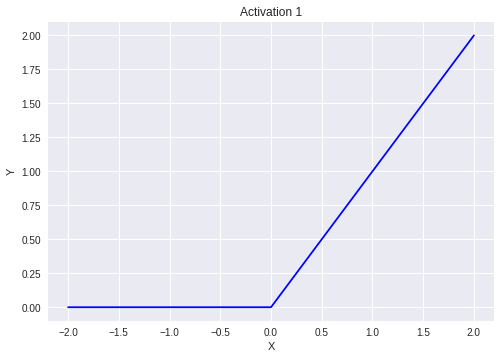

xs_arr2 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr2 =  [0.  0.  0.  0.  0.5 1.  2. ]


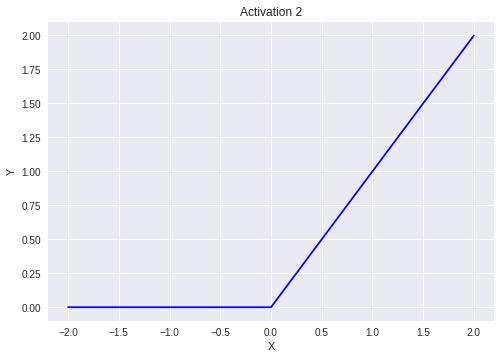

xs_arr3 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr3 =  [0.  0.  0.  0.  0.5 1.  2. ]


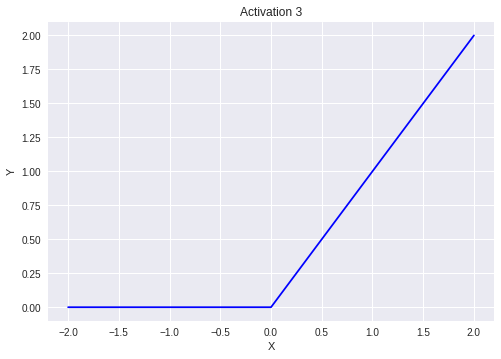

last best epoch =  -1
Epoch 001: cost = 0.318, accuracy = 90.33%
Validation Cost:0.053  Validation Accuracy: 98.64%
Min Validation Cost:0.053  Max Validation Accuracy: 98.64%
xs_arr1 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr1 =  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -3.7721739e-04
  5.0013220e-01  1.0003339e+00  1.9999803e+00]


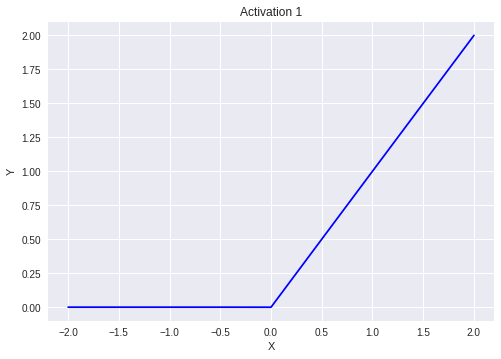

xs_arr2 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr2 =  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -7.7297888e-04
  4.9998468e-01  1.0010262e+00  2.0004814e+00]


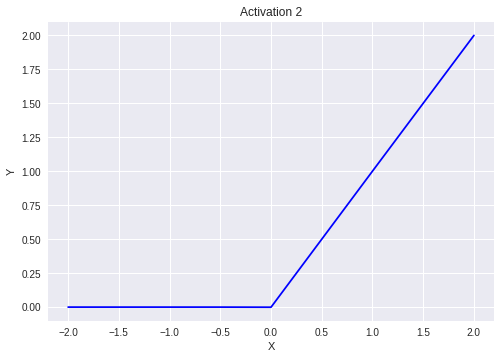

xs_arr3 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr3 =  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -4.2390011e-04
  4.9962533e-01  1.0011041e+00  2.0031860e+00]


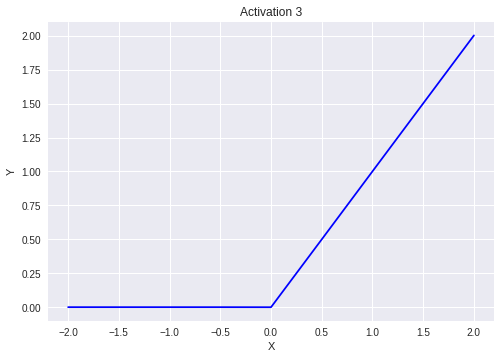

last best epoch =  1.0
Epoch 002: cost = 0.089, accuracy = 97.47%
Validation Cost:0.030  Validation Accuracy: 99.13%
Min Validation Cost:0.030  Max Validation Accuracy: 99.13%
xs_arr1 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr1 =  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -6.4591260e-04
  4.9996573e-01  1.0003757e+00  1.9999686e+00]


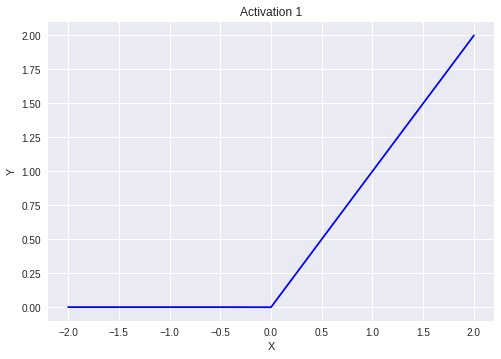

xs_arr2 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr2 =  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -1.0752503e-03
  4.9985528e-01  1.0013288e+00  2.0007339e+00]


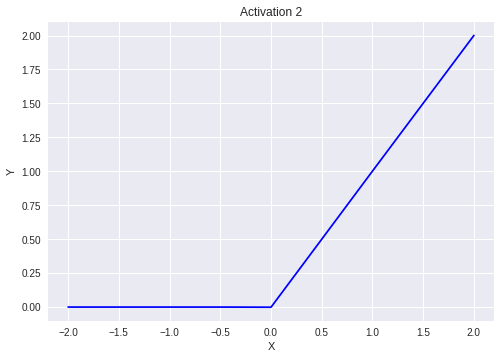

xs_arr3 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr3 =  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -5.0191965e-04
  4.9951887e-01  1.0013381e+00  2.0040154e+00]


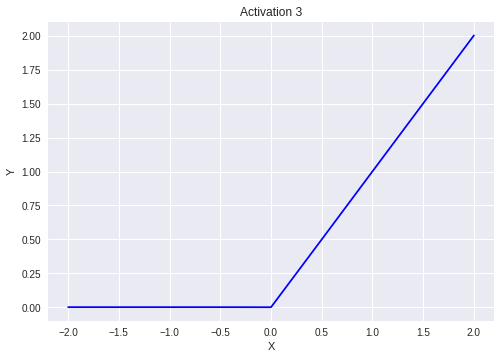

last best epoch =  2.0
Epoch 003: cost = 0.064, accuracy = 98.20%
Validation Cost:0.021  Validation Accuracy: 99.41%
Min Validation Cost:0.021  Max Validation Accuracy: 99.41%
xs_arr1 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr1 =  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -8.5525709e-04
  4.9983865e-01  1.0004323e+00  1.9999682e+00]


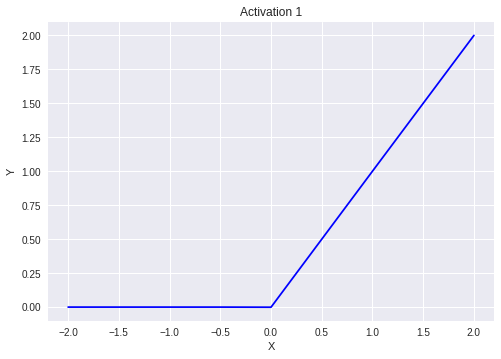

xs_arr2 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr2 =  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -1.2532144e-03
  4.9977341e-01  1.0014937e+00  2.0008802e+00]


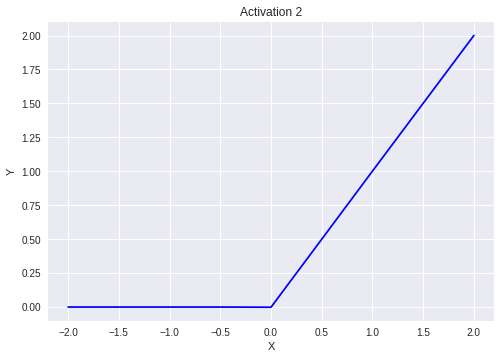

xs_arr3 =  [-2.  -1.  -0.5  0.   0.5  1.   2. ]
ys_arr3 =  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -5.4107694e-04
  4.9946511e-01  1.0014849e+00  2.0045266e+00]


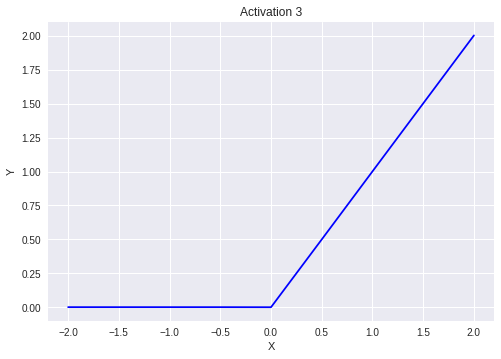

last best epoch =  3.0
Epoch 004: cost = 0.051, accuracy = 98.58%
Validation Cost:0.021  Validation Accuracy: 99.29%
Min Validation Cost:0.021  Max Validation Accuracy: 99.41%


In [17]:
min_cost = 100000.0
max_accuracy = 0.0

epoch = 0 
last_best_epoch = -1

vary_it = 0

first_epoch = 1

 
min_cost = 100000.0
max_accuracy = 0.0
last_best_epoch = -1
loss_at_be = 0
  

while(1):
    
    global xs_arr1,ys_arr1,xs_arr2,ys_arr2,xs_arr3,ys_arr3,nxs_arr1,nys_arr1,nxs_arr2,nys_arr2,nxs_arr3,nys_arr3
    
    print("xs_arr1 = ",xs_arr1)
    print("ys_arr1 = ",ys_arr1)
    
    plt.title("Activation 1")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(xs_arr1,ys_arr1,'b')
    plt.show()
    
    print("xs_arr2 = ",xs_arr2)
    print("ys_arr2 = ",ys_arr2)
    
    plt.title("Activation 2")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(xs_arr2,ys_arr2,'b')
    plt.show()
    
    print("xs_arr3 = ",xs_arr3)
    print("ys_arr3 = ",ys_arr3)
    
    plt.title("Activation 3")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(xs_arr3,ys_arr3,'b')
    plt.show()

    least_epoch = min(epoch_arr.shape[0],min(cost_arr.shape[0],accuracy_arr.shape[0]))    
    epoch = epoch_arr[least_epoch-1] + 1
    print("last best epoch = ",last_best_epoch)
    
   
    nxs_arr1 = np.array(xs_arr1)
    nys_arr1 = np.array(ys_arr1)
    nxs_arr2 = np.array(xs_arr2)
    nys_arr2 = np.array(ys_arr2)
    nxs_arr3 = np.array(xs_arr3)
    nys_arr3 = np.array(ys_arr3)
  
  
  
    avg_cost = 0.0 # track cost to monitor performance during training
    avg_accuracy_pct = 0.0

    # loop over all batches of the epoch:
    n_batches = int(train_x.shape[0] / batch_size)

    for i in range(n_batches):

        nys_arr1 = np.zeros(ys_arr1.shape[0],dtype=np.float32)
        nys_arr2 = np.zeros(ys_arr2.shape[0],dtype=np.float32)
        nys_arr3 = np.zeros(ys_arr3.shape[0],dtype=np.float32)
        
        batch_x, batch_y = next_batch(batch_size,train_x,train_y)
        _, batch_cost, batch_acc, wd, bd = session.run([optimizer, cost, accuracy_pct,weight_dict,bias_dict], 
                                               feed_dict={x: batch_x, y: batch_y,do_dropout: np.array([1.0],dtype=np.float32)})

        avg_cost += batch_cost / n_batches
        avg_accuracy_pct += batch_acc / n_batches
        
        ys_arr1 = nys_arr1
        ys_arr2 = nys_arr2
        ys_arr3 = nys_arr3
        
    # output logs at end of each epoch of training:
    print("Epoch ", '%03d' % (epoch), 
          ": cost = ", '{:.3f}'.format(avg_cost), 
          ", accuracy = ", '{:.2f}'.format(avg_accuracy_pct), "%", 
          sep='')

    
    
    t_batches = int(val_x.shape[0] / 100)

    test_cost = 0
    test_accuracy_pct = 0

    for i in range(t_batches):

      img,lbl = next_batch(100,val_x,val_y)
      interim_test_cost = session.run(cost,feed_dict={x: img, y: lbl,do_dropout: np.array([0.0],dtype=np.float32)})
      interim_test_accuracy_pct = session.run(accuracy_pct,feed_dict={x: img, y: lbl,do_dropout: np.array([0.0],dtype=np.float32)})
      test_cost+=(interim_test_cost/(t_batches))
      test_accuracy_pct+=(interim_test_accuracy_pct/(t_batches))

      
    epoch_arr = np.append(epoch_arr,epoch)
    cost_arr = np.append(cost_arr,test_cost)
    accuracy_arr = np.append(accuracy_arr,test_accuracy_pct)
    
    train_cost_arr = np.append(train_cost_arr,avg_cost)
    train_accuracy_arr = np.append(train_accuracy_arr,avg_accuracy_pct)
    

    print("Validation Cost:", '{:.3f}'.format(test_cost),"  Validation Accuracy: ", '{:.2f}'.format(test_accuracy_pct), "%", sep='')
    
    min_cost = min(min_cost,test_cost)
    max_accuracy = max(max_accuracy,test_accuracy_pct)
    if(max_accuracy == test_accuracy_pct):
      last_best_epoch = epoch
    print("Min Validation Cost:", '{:.3f}'.format(min_cost),"  Max Validation Accuracy: ", '{:.2f}'.format(max_accuracy), "%", sep='')

    if (epoch-last_best_epoch) > epoch_no_change:
      break
      
    if(test_cost<=0.00504):
      break
    
    epoch = epoch+1


#### Visualize Loss and Accuracy

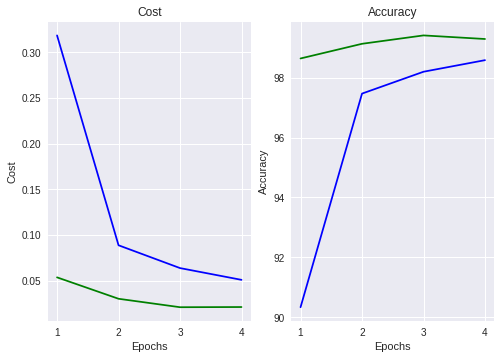

In [18]:
  plt.subplot(1,2,1)
  plt.title("Cost")
  plt.xlabel("Epochs")
  plt.ylabel("Cost")
  plt.plot(epoch_arr[1:],train_cost_arr[1:],'b')
  plt.plot(epoch_arr[1:],cost_arr[1:],'g')

  plt.subplot(1,2,2)
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.plot(epoch_arr[1:],train_accuracy_arr[1:],'b')
  plt.plot(epoch_arr[1:],accuracy_arr[1:],'g')

  plt.show()

#### Test Model

In [19]:
#Testing already done in every epoch.
print("Training Complete. Testing Model.\n")

t_batches = int(mnist.test.num_examples / 100)

test_cost = 0
test_accuracy_pct = 0

for i in range(t_batches):

  img,lbl = mnist.test.next_batch(100)
  interim_test_cost, interim_test_accuracy_pct = session.run([cost, accuracy_pct], feed_dict={x: img, y: lbl, do_dropout: np.array([0.0],dtype=np.float32)})
  test_cost+=(interim_test_cost/t_batches)
  test_accuracy_pct+=(interim_test_accuracy_pct/t_batches)

print("Test Cost:", '{:.3f}'.format(test_cost))
print("Test Accuracy: ", '{:.2f}'.format(test_accuracy_pct), "%", sep='')

session.close()

Training Complete. Testing Model.

Test Cost: 0.025
Test Accuracy: 99.06%
